In [54]:
#basic genetic algorithm Python code provided as base code for the DSA/ISE 5113 course
#author: Charles Nicholson
#date: 4/5/2019

#NOTE: You will need to change various parts of this code.  However, please keep the majority of the code intact (e.g., you may revise existing logic/functions and add new logic/functions, but don't completely rewrite the entire base code!)  
#However, I would like all students to have the same problem instance, therefore please do not change anything relating to:
#   random number generation
#   number of items (should be 150)
#   random problem instance
#   weight limit of the knapsack

#------------------------------------------------------------------------------

#Student name:
#Date: 


#need some python libraries
import copy
import math
from random import Random
import numpy as np


#to setup a random number generator, we will specify a "seed" value
#need this for the random number generation -- do not change
seed = 51132023
myPRNG = Random(seed)

#to get a random number between 0 and 1, use this:             myPRNG.random()
#to get a random number between lwrBnd and upprBnd, use this:  myPRNG.uniform(lwrBnd,upprBnd)
#to get a random integer between lwrBnd and upprBnd, use this: myPRNG.randint(lwrBnd,upprBnd)

#number of elements in a solution
n = 150

#create an "instance" for the knapsack problem
value = []
for i in range(0,n):
    #value.append(round(myPRNG.expovariate(1/500)+1,1))
    value.append(round(myPRNG.triangular(150,2000,500),1))
    
weights = []
for i in range(0,n):
    weights.append(round(myPRNG.triangular(8,300,95),1))
    
#define max weight for the knapsack
maxWeight = 2500


#change anything you like below this line, but keep the gist of the program ------------------------------------

# First, I import the libraries I need
from random import choices, randint, randrange, random
from typing import List, Optional, Callable, Tuple

#monitor the number of solutions evaluated
solutionsChecked: int = 0


populationSize: int = 150 #size of GA population
Generations: int = 100   #number of GA generations
crossOverRate: float = 0.8  #currently not used in the implementation; neeeds to be used.
mutationRate: float = 0.05  #currently not used in the implementation; neeeds to be used.
eliteSolutions: int = 10  #currently not used in the implementation; neeed to use some type of elitism

prop_one: float = 0.2 # probablity of a chromosome being 1

Genome = list[int]
Population = list[Genome]

# First: I create the greedy solution, this is the solution that I will use as a benchmark, I want to at least get this solution with my GA.

# Greedy initial solution
def initial_solution_greedy() -> list[int]:
    items: list[tuple[float,float,intt]] = [(value[i], weights[i], i) for i in range(n)]
    items.sort(key=lambda item: item[0] / item[1], reverse=True)
    x: list[int] = [0] * n
    totalWeight: float = 0
    for v, w, idx in items:
        if totalWeight + w <= maxWeight:
            x[idx] = 1
            totalWeight += w
    return x


#create an continuous valued chromosome 
def createChromosome(n: int, prop_one: float = 0.5) -> Genome:   
    #this code as-is expects chromosomes to be stored as a list, e.g., x = []
    #write code to generate chromosomes, most likely want this to be randomly generated
    return choices([0, 1], weights=[1 - prop_one, prop_one], k=n)
    


In [165]:
x = createChromosome(n, prop_one)

#function to compute the weight of chromosome x
def calcWeight(x: list[int])-> float:
    return np.dot(x, weights)  #compute the weight of the knapsack selection




def itemsSelected(x: list[int]) -> int:
    return np.sum(x)   #returns total number of items selected 

penalty_factor: float = 2.0  # Adjust this to control penalty severity of penalty for being overwgiht

#function to evaluate a solution x

def evaluate(x: list[int],penalty_factor: float = 2.0)-> float:
    total_weight: float = calcWeight(x)  #compute the weight of the knapsack selection
    total_value: float = np.dot(x, value)     #compute the value of the knapsack selection
    if total_weight > maxWeight:
        excess: float = total_weight - maxWeight
        # Penalize solutions that are overweight
        # More overweight = more negative fitness
        return -(excess * penalty_factor)
    return total_value  #return the value of the knapsack selection




print("total weight", calcWeight(x),"items selected", itemsSelected(x))

print("total value", evaluate(x))

total weight 2979.4 items selected 24
total value -958.8000000000002


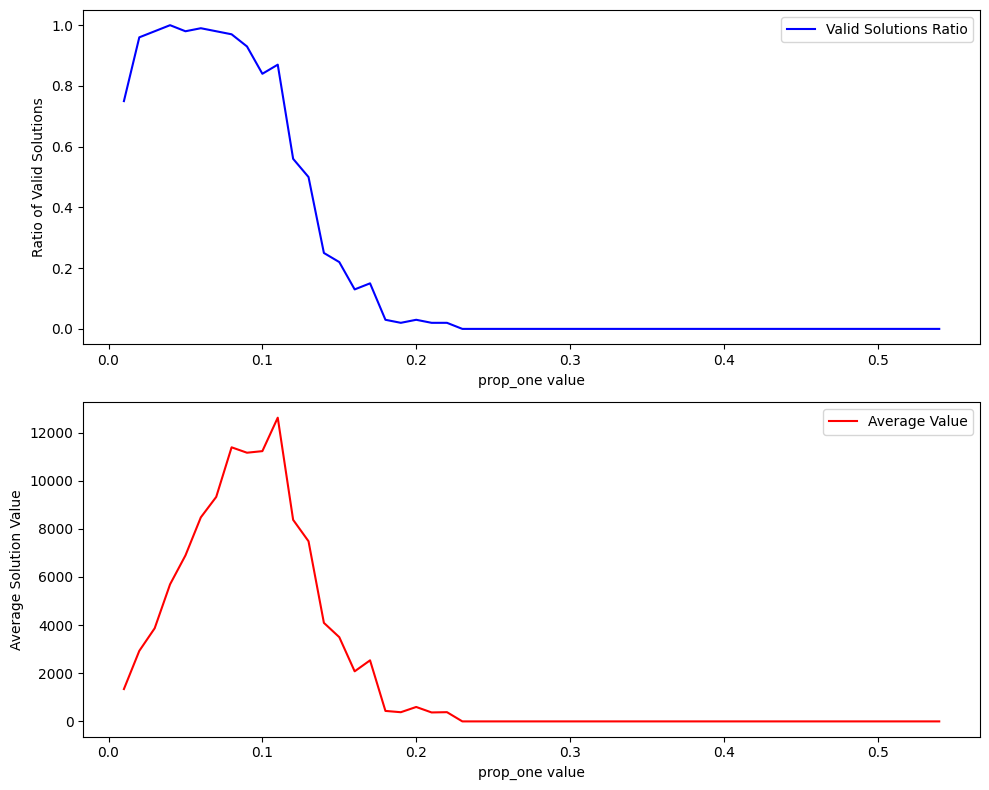

In [260]:
import matplotlib.pyplot as plt

def analyze_prop_one() -> None:
    prop_ones: np.ndarray = np.arange(0.01, 0.55, 0.01)
    positive_ratios: list[float] = []
    avg_values: list[float] = []
    
    for prop in prop_ones:
        positives: int = 0
        total_value: float = 0
        trials: int = 100
        
        for _ in range(trials):
            chromosome: list[int] = createChromosome(n, prop)
            value: float = evaluate(chromosome)
            if value > 0:
                positives += 1
                total_value += value
        
        positive_ratios.append(positives/trials)
        avg_values.append(total_value/trials)
    
    # Create plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    ax1.plot(prop_ones, positive_ratios, 'b-', label='Valid Solutions Ratio')
    ax1.set_xlabel('prop_one value')
    ax1.set_ylabel('Ratio of Valid Solutions')
    ax1.legend()
    
    ax2.plot(prop_ones, avg_values, 'r-', label='Average Value')
    ax2.set_xlabel('prop_one value')
    ax2.set_ylabel('Average Solution Value')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

analyze_prop_one()